## Task 1: Reading Data

The following cell of code reads the texts and the corresponding labels of suggestion/non-suggestion from the CSV file. The first task is to create training and test sets. Use the final $1000$ rows of the data as a test set and the rest of the data for training.

In [1]:
import numpy as np
import pandas as pd

# Read the CSV file.
df = pd.read_csv('Data.Assignment2.SemEvalTask9SubtaskA.csv', 
                 names=['id', 'text', 'label'], header=0)

# Set seed for reproducibility and shuffle the rows.
np.random.seed(888)
df = df.sample(frac=1).reset_index(drop=True)

# Store the data as a list of tuples where the first item is the text
# and the second item is the label.
data = [(text, label) for (idx, text, label) in df.values.tolist()]
print(data[:2])
# Create training and test sets.
train_texts, train_labels = [], []
test_texts, test_labels = [], []

#################### EDIT BELOW THIS LINE #########################
#iterating over all the rows except for the last 1000 rows
for d in data[:-1000]:
    #creating a list of training data
    train_texts.append(d[0])
    #creating a list of training labels
    train_labels.append(d[1])
    #iterating over the last 1000 rows
for d in data[-1000:]:
    #using the last 1000 rows to create test data
    test_texts.append(d[0])
    #using the last 1000 rows to create labels
    test_labels.append(d[1])

#################### EDIT ABOVE THIS LINE #########################

# Check that training set and test set are of the right size.
assert len(test_texts) == len(test_labels) == 1000
assert len(train_texts) == len(train_labels) == 5100

[('"Warning 4668 is an extra one we have enabled beyond warning level 4."', 0), ('"Make it possible to optionally declare a function OnClick() for live tiles, such that this code is executed when the live tiles is presed without leaving the home screen."', 1)]


## Task 2: Data Pre-processing (30 Marks)

Explain at least 3 steps that you will perform to preprocess the texts before training a classifier.

Ans:

---

You cannot simply work with raw data, no matter what machine learning model you’re using, and there is no right way to do pre-processing.  However, there are some general steps that we can follow. 
The following are the steps taken and the major things taken into consideration:
1.	Tokenize the data
In this case we can simply split the data with respect to white spaces using sentence.split(“ “). But this would keep the punctuations. We can instead use this and then make use of the translate function to map all the punctuations to “ ” or empty spaces. The approach taken up here is the regex model which allows us to clean up the strings by keeping the alphanumeric characters. We can also use word_tokenize from the nltk library for this.
2.	Normalizing the case
By removing case sensitivity, we’ll read ‘Keep’ and ‘keep’ as a single word, thus reducing vocabulary. However, this will also cause us to lose some distinctions eg: name like ‘Cliff’ and ‘cliff’ will be treated the same. Since we do not have a lot of proper nouns, we can use this in our case. Lower() is used for this purpose.
3.	Remove empty strings and digits and stopwords from the text
Irrelevant data in the test can be removed to further reduce the vocabulary and keep only the relevant content.
4.	Stemmers and lemmatizers
There are both used to trim the words, reduce the vocabulary and focus on the meaning of the word, but each work in different ways. Stemmers will not always return a meaningful word, on the other hand lemmatizers always does. So as we move from bag of words approach to word encodings, we might be better off using lemmatizers instead of stemmers. In general, only minimal clean up is required for more sophisticated word encodings like Word2Vec or Glove.

---
An implementation of the steps you mentioned above. 
Libraries used:
nltk


In [3]:
#removing multiple underscores in a single word to make tokenization more meaningful 
def remove_(text):
    empty_str_removed=[]
    for sentence in text:
        new_sen=sentence.replace('_', ' ');
        empty_str_removed.append(new_sen)
    return empty_str_removed

In [4]:
new_train_texts=remove_(train_texts)
new_test_texts=remove_(test_texts)

In [5]:
#tokenize using regular expressions
import re
def tokenize(text):
    tokenized_text=[]
    for sentence in text:
        sentence=re.split(r'\W+', sentence)
        tokenized_text.append(sentence)
    return tokenized_text

In [6]:
tokenized_text_train=tokenize(new_train_texts)
tokenized_text_test=tokenize(new_test_texts)

In [7]:

def clean(text):
    # remove empty strings
    empty_str_removed=[]
    for str_list in text:
        str_list = list(filter(None, str_list))
        empty_str_removed.append(str_list)
    #remove digits
    no_integers=[]
    for str_list in empty_str_removed:
        str_list = [strgs for strgs in str_list if not strgs.isdigit()]
        no_integers.append(str_list)
    # turn to lower case
    to_lower=[]
    for str_list in no_integers:
        str_list = [strgs.lower() for strgs in str_list]
        to_lower.append(str_list)
    return(to_lower)

In [8]:
clean_train_text=clean(tokenized_text_train)
clean_test_text=clean(tokenized_text_test)


In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [20]:
new_stopword=stopwords.words('english')
print(len(new_stopword))
list_2=['no',
 'nor',
 'not','about',
 'against','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",
 'doesn',
 "doesn't",
 'hadn',"hadn't",'hasn',"hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",'mustn',"mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',
 'wasn', "wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't",'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't",'don', "don't", 'should', "should've"
]
for element in new_stopword:
    if element in new_stopword:
        new_stopword.remove(element)
print(new_stopword)
print(len(new_stopword))


179
['me', 'myself', 'our', 'ourselves', "you're", "you'll", 'your', 'yourself', 'he', 'his', 'she', 'her', 'herself', "it's", 'itself', 'them', 'theirs', 'what', 'who', 'this', "that'll", 'those', 'is', 'was', 'be', 'being', 'has', 'having', 'does', 'doing', 'an', 'and', 'if', 'because', 'until', 'of', 'by', 'with', 'against', 'into', 'during', 'after', 'below', 'from', 'down', 'out', 'off', 'under', 'further', 'once', 'there', 'where', 'how', 'any', 'each', 'more', 'other', 'such', 'nor', 'only', 'same', 'than', 'very', 't', 'will', 'don', 'should', 'now', 'll', 'o', 've', 'ain', "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']
89


In [21]:
#remove comman and irrelevant words
def remove_stopwords(text):
    removed_stopwords=[]
    for str_list in text:
        filtered_words = [word for word in str_list if word not in new_stopword]
        removed_stopwords.append(filtered_words)
    return removed_stopwords

In [22]:
noStop_train_text=remove_stopwords(clean_train_text)
noStop_test_text=remove_stopwords(clean_test_text)

In [23]:
#trims the word to a meaningful word
def lemmatizer(text):
    filtered_words_lemmatize=[]
    lemmatizer = WordNetLemmatizer()
    for str_list in text:
        filtered_words = [lemmatizer.lemmatize(word) for word in str_list]
        filtered_words_lemmatize.append(filtered_words)
    return filtered_words_lemmatize

In [24]:
lemmatize_train_text=lemmatizer(noStop_train_text)
lemmatize_test_text=lemmatizer(noStop_test_text)

In [25]:
#cuts the word to it's root. But often forms meaningless words
def stemmer(text):   
    ps = PorterStemmer()
    test_filtered_words_stem=[]
    for str_list in text:
        filtered_words = [ps.stem(word) for word in str_list]
        test_filtered_words_stem.append(filtered_words)
    return test_filtered_words_stem

In [26]:
#stemmers not used in either of the models. However, it maybe used for tf-idf. 
#This was tested and the results were more or less the same.
stemmed_train_text=stemmer(lemmatize_train_text)
stemmed_test_text=stemmer(lemmatize_test_text)

In [28]:
 def join(text):
    test_list_joined=[]
    for str_list in text:
        str=' '.join(str_list)
        test_list_joined.append(str)
    return test_list_joined

In [29]:
join_train_text=join(lemmatize_train_text)
join_test_text=join(lemmatize_test_text)

## Task 3: Feature Engineering (I) - TF-IDF as features 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [31]:
 def tfidf_converter(list_train,list_test):
    #determines the number of features for this test set
    cv = CountVectorizer()
    #creates a collection of tokens for the model to use
    word_count_vector = cv.fit_transform(list_train)
    #convert to a useable dataframe
    tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
    tfidf_transformer = TfidfTransformer()
    #fir and transfor the training set according to the features set
    X = tfidf_transformer.fit_transform(word_count_vector)
    idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
    #only transform and not fit the test set to create vectors with the same number of features as 
    #earlier defined
    test_word_count_vector = cv.transform(list_test)
    test_tf = pd.DataFrame(test_word_count_vector.toarray(), columns=cv.get_feature_names())
    #the test set is transformed
    X_test = tfidf_transformer.transform(test_word_count_vector)
    return X.toarray(),X_test.toarray()

In [32]:
X,X_test=tfidf_converter(join_train_text,join_test_text)

In [33]:
from sklearn.naive_bayes import GaussianNB


In [34]:
def GaussianNB_predict(X,X_test):
    gnb_predicted_test = []# save your predictions on the test set into this list
    gnb_predicted_train=[]# to check for underfitting and overfitting
    y=train_labels
    y_test=test_labels
    gb = GaussianNB(var_smoothing=0.075) # naive_bayes model is created
    gb.fit(X, y) # data is fited with training data
    gnb_predicted_test=gb.predict(X_test) # prediction made on test data
    gnb_predicted_train=gb.predict(X)     # training data is also tested
    return gb,gnb_predicted_test,gnb_predicted_train

In [35]:
gb,gnb_predicted_test,gnb_predicted_train=GaussianNB_predict(X,X_test)

In [36]:
def accuracy(labels, predictions):
  '''
  Calculate the accuracy score for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''
  assert len(labels) == len(predictions)
  
  correct = 0
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct += 1 
  
  score = correct / len(labels)
  return score



In [37]:
y=train_labels
y_test=test_labels
print(accuracy(y_test, gnb_predicted_test))
print(accuracy(y, gnb_predicted_train))

0.644
0.7864705882352941


## Task 4: Evaluation Metrics 

Why is accuracy not the best measure for evaluating a classifier? Describe an evaluation metric which might work better than accuracy for a classification task such as suggestion detection.


In [38]:
#entire model class distribution
labels=test_labels+train_labels
print(labels.count(0))
print(len(labels))
print(labels.count(1))


4015
6100
2085


In [39]:
#test label class distribution
print(test_labels.count(0))
print(len(test_labels))
print(test_labels.count(1))

648
1000
352



---
When we check the count of each of the distinct labels, we can see that this problem is not balanced with this data. The cases with 0 as the label is almost twice that of 1! So we clearly have a majority class and a minority class. Now if we create a classifier that predits 0 at all times, it will still have a high accuracy rate.(In this case .648 as observed from the test label class distribution). That is why accuracy is not a good way to evaluate the classifier in this case.

Better Evaluation Metrics:
    Precision-Recall Metrics
Precision : Rate of the true positives. Tells us how well the positive classes are predicted.
    Precision = TruePositive / (TruePositive + FalseNegative)

Recall: Rate of the true negatives. This tells us how well the negative classes are predicted.
    Recall = TrueNegative / (FalsePositive + TrueNegative)
In this case, precision might be more useful as it will tell you how many were correctly classified.
The combination of precision and recal to balance both concerns is the F-score. 

Confusion Matrix as we know will be really helpful as it gives you the data about true positive and true negatives.

All these are better metrics when compared to accuracy and should be used here.
ROC Area Under Curve or Precision-Recall Area Under Curve can be used for severely imbalanced problem.

(Not under the scope with the current word limit)


---

In [40]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [41]:
def evaluate_metrics(y,y_test,pred_train,pred_test):
    print('Accuracy of test data: %.3f' % accuracy(y_test, pred_test))
    # train data is also evaluated to understand underfitting and overfitting.
    #Since the accuracy of training data is high, overfitting is very likely
    print('Accuracy of train data: %.3f' % accuracy(y, pred_train)) 

    print('Precision of test data: %.3f' % precision_score(y_test, pred_test))

    print('Recall of test data: %.3f' % recall_score(y_test, pred_test))

    print('f1_score of test data: %.3f' % f1_score(y_test, pred_test))


In [42]:
evaluate_metrics(y,y_test,gnb_predicted_train,gnb_predicted_test)

Accuracy of test data: 0.644
Accuracy of train data: 0.786
Precision of test data: 0.497
Recall of test data: 0.832
f1_score of test data: 0.622


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [44]:
#Confusion Matrix as we know will be really helpful as it gives you the data about true positive and true negatives.

def confusion_matrix_plot(y,X,model):
    plot_confusion_matrix(model, X, y)
    plt.show()

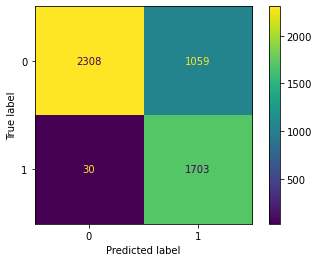

In [45]:
confusion_matrix_plot(y,X,gb)

#we can see why the recall of the train set is 1 looking at the confusion matrix below
#The label predicts 1 more than 0. This is considering the majority class is 0

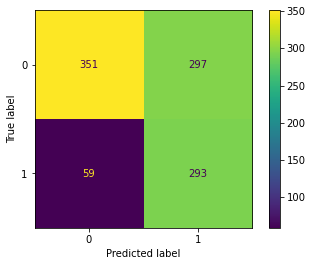

In [46]:
confusion_matrix_plot(y_test,X_test,gb)


# Task 5: Feature Engineering (II) - Other features

In [47]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [49]:
# code taken from Exercise sheet 8 and modified for this task

import gensim.downloader as api
print("downloading glove embeddings. please note this may take a few minutes")
glove = api.load('glove-wiki-gigaword-300')
print("finished downloading glove")

downloading glove embeddings. please note this may take a few minutes
finished downloading glove


In [50]:
print(len(lemmatize_train_text))
print(len(lemmatize_test_text))

5100
1000


In [51]:
# code taken from Exercise sheet 8 and modified for this task
def vectorize(text):
    all_text_vecs = []
    oov = np.random.rand(1,300) # random vector to represent out-of-vocab

    # 1. Loop over text toks. 
    for toks in text:
      train_vecs = []

      # 2. Loop over each word in the tokenzed input
      for tok in toks:
        # If token exists glove, add its embedding to text_vecs
        if tok in glove:
          train_vecs.append(glove[tok])

      # 3. Once you extracted all the word embedding for the input
      # append text_vecs to all_text_vecs in the else condition 
      if train_vecs == []:
        # special case where list is empty and no word embeddings were found
        all_text_vecs.append(oov)
      else:
        all_text_vecs.append(train_vecs)
    
    print("finished")
    print(f"Check length of all_text_vecs == length of text toks: {len(all_text_vecs)==len(text)}")
    return all_text_vecs

In [55]:
vec_test=vectorize(lemmatize_test_text)
vec_train=vectorize(lemmatize_train_text)


finished
Check length of all_text_vecs == length of text toks: True
finished
Check length of all_text_vecs == length of text toks: True


In [53]:
def mean_vec(all_text_vecs):
    all_pooled_vecs = []

    # 1. Loop over each list of word embeddings per input
    for text_vecs in all_text_vecs:
      # 2. Vstack and take the mean of the tex vecs
      mean_pool = np.mean(np.vstack(text_vecs), axis=0)

      # 3. Append the mean pooled vector to all_pooled_vecs
      all_pooled_vecs.append(mean_pool)

    # 4 Update dataset with these pooled vectors
    print(len(all_pooled_vecs))
    print("finished")
    print(f"sanity check {len(all_pooled_vecs) == len(all_text_vecs)}")
    print(f"sanity check {np.vstack(all_pooled_vecs).shape[1] == 300}")
    return all_pooled_vecs

In [56]:
X_vec_mean_test=mean_vec(vec_test)
X_vec_mean_train=mean_vec(vec_train)


1000
finished
sanity check True
sanity check True
5100
finished
sanity check True
sanity check True


In [57]:
gb1,gnb_pred_vec_test,gnb_pred_vec_train=GaussianNB_predict(X_vec_mean_train,X_vec_mean_test)

In [58]:
evaluate_metrics(y,y_test,gnb_pred_vec_train,gnb_pred_vec_test)

Accuracy of test data: 0.456
Accuracy of train data: 0.440
Precision of test data: 0.390
Recall of test data: 0.972
f1_score of test data: 0.557


In [59]:
X_2_test=np.array(X_vec_mean_test)
X_2=np.array(X_vec_mean_train)

X_1=np.array(X)
X_1_test=np.array(X_test)
print(X_1.shape)
print(X_2.shape)


(5100, 6683)
(5100, 300)


In [60]:
#horizontally stacking to combine all the features created.
X_train_comb = np.hstack((X_1,X_2))
X_test_comb = np.hstack((X_1_test,X_2_test))
#X_test_comb = np.hstack((X_test, X_test_new))
print(X_train_comb.shape)
print(X_test_comb.shape)

(5100, 6983)
(1000, 6983)


In [61]:
gb2,gnb_pred_vec_test_comb,gnb_pred_vec_train_comb=GaussianNB_predict(X_train_comb,X_test_comb)

In [62]:
#evaluation of the new model
#precision and accuracy are low, but f1_score indicates that overfitting does not occur anymore.
evaluate_metrics(y,y_test,gnb_pred_vec_train_comb,gnb_pred_vec_test_comb)

Accuracy of test data: 0.456
Accuracy of train data: 0.447
Precision of test data: 0.390
Recall of test data: 0.972
f1_score of test data: 0.557
